# **Section by Ted : Exploratory Data Analysis**

---
## Step 1.  Dataset Overview
**Why are we doing this?**
- Before starting any analysis, we need to understand the structure of the dataset. This helps us identify:

- The number of rows (observations) and columns (features).

- The type of each column (numeric, categorical, etc.).

- Whether there are missing values or unusual data types.

- The general quality of the dataset for further analysis.

- This step ensures we know what data we are working with and helps us plan the next steps in EDA.

---

In [3]:
# Step 1: Load and inspect the dataset
import pandas as pd

# Load your dataset (replace 'your_dataset.csv' with the actual filename)
df = pd.read_csv("../data/transformed/transformed_data.csv")

# Display the first 5 rows to see sample data
df.head()



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,customer_lat,customer_lng,seller_lat,seller_lng,profit_margin,purchase_frequency
0,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,...,31570.0,belo horizonte,sp,perfumery,-16.515006,-44.660711,-19.902360,-43.980427,0.81,1.0
1,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,...,14840.0,guariba,sp,auto,-16.745150,-48.514783,-21.363502,-48.229601,0.88,1.0
2,5ff96c15d0b717ac6ad1f3d77225a350,19402a48fe860416adf93348aba37740,delivered,2018-07-25 17:44:10,2018-07-25 17:55:14,2018-07-26 13:16:00,2018-07-30 15:52:25,2018-08-08,1.0,10adb53d8faa890ca7c2f0cbcb68d777,...,14940.0,ibitinga,sp,bed_bath_table,-23.713190,-46.687407,-21.757321,-48.829744,0.36,1.0
3,f3e7c359154d965827355f39d6b1fdac,62b423aab58096ca514ba6aa06be2f98,delivered,2018-08-09 11:44:40,2018-08-10 03:24:51,2018-08-10 12:29:00,2018-08-13 18:24:27,2018-08-17,1.0,e99d69efe684efaa643f99805f7c81bc,...,14910.0,tabatinga,sp,stationery,-23.531732,-47.499804,-21.737063,-48.687601,0.84,1.0
4,b276e4f8c0fb86bd82fce576f21713e0,cf8ffeddf027932e51e4eae73b384059,delivered,2018-07-29 23:34:51,2018-07-29 23:45:15,2018-07-30 14:43:00,2018-07-31 22:48:50,2018-08-06,1.0,c6c1f263e076bd9c1f1640250a5d0c29,...,13030.0,campinas,sp,perfumery,-22.740602,-47.375821,-22.924970,-47.074284,0.95,1.0


---
- The first few rows give a snapshot of the dataset.

- Look for any weird values or unexpected columns.

- Check if the column names make sense and match what we expect (e.g., freight_value, price, etc.).
---

## Step 2. Dataset Summary (Shape, Data Types, Missing Values)
**Why are we doing this?**
- After viewing a few rows, we need to:

   - Check the dataset dimensions (number of rows and columns).

   - Understand the data types of each feature to know which are numerical, categorical, or otherwise.

   - Detect missing values that may need cleaning or imputation.

   - Identify any potential data quality issues early before deeper analysis.

- This step gives us a high-level understanding of the dataset structure.



In [4]:
# Step 2: Dataset Summary
# Shape of the dataset
print("Shape of dataset (rows, columns):", df.shape)

# Data types and non-null counts
print("\nInfo about dataset:")
print(df.info())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())



Shape of dataset (rows, columns): (11777, 44)

Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11777 entries, 0 to 11776
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       11777 non-null  object 
 1   customer_id                    11777 non-null  object 
 2   order_status                   11777 non-null  object 
 3   order_purchase_timestamp       11777 non-null  object 
 4   order_approved_at              11777 non-null  object 
 5   order_delivered_carrier_date   11777 non-null  object 
 6   order_delivered_customer_date  11777 non-null  object 
 7   order_estimated_delivery_date  11777 non-null  object 
 8   order_item_id                  11777 non-null  float64
 9   product_id                     11777 non-null  object 
 10  seller_id                      11777 non-null  object 
 11  shipping_limit_date            11777 no

---
### Interpretation of Dataset Summary
***1. Shape of the Dataset***
Rows: 11,777

Columns: 44
- This means we have 11,777 observations with 44 features to work with.
- The dataset is relatively large, which is good for building reliable models.

***2. Data Types***
- Numerical Features (Floats & Ints): 22 columns (e.g., price, freight_value, product_weight_g, etc.)

- Categorical Features (Objects): 22 columns (e.g., order_status, payment_type, customer_city, etc.)

- Datetime Features: Stored as object, but they should be converted to proper datetime format for analysis (order_purchase_timestamp, order_delivered_customer_date, etc.).

***3. Missing Values***
- No missing values detected.(because we had completed the etl process before hand)
- This makes our cleaning process easier. However, we still need to check for outliers or inconsistent entries later.

***4. Key Observations***
- Many columns seem to be IDs (like order_id, customer_id, product_id), which are identifiers and not useful for modeling directly.

- We have geolocation data (customer_lat, customer_lng, seller_lat, seller_lng) that could be used for advanced analysis.

- Several columns (product_category_name, product_category_name_english) may need preprocessing
---


## Step 3: Descriptive Statistics for Numerical Features

### Why Are We Doing This?
Descriptive statistics help us understand the **central tendency**, **spread**, and **distribution** of numerical variables.  
This gives insights such as:
- The average values (mean, median)
- The variability (standard deviation, min, max)
- Detecting potential **outliers** or **data anomalies**

We will use the `.describe()` function from pandas to summarize all numerical columns.


In [5]:
# Display descriptive statistics for numerical columns
df.describe()



,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,customer_zip_code_prefix,product_name_lenght,product_description_lenght,...,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,customer_lat,customer_lng,seller_lat,seller_lng,profit_margin,purchase_frequency
count,11777.0,11777.000000,11777.000000,11777.0,11777.000000,11777.000000,11777.000000,11777.000000,11777.000000,11777.000000,...,11777.000000,11777.000000,11777.000000,11777.000000,11777.000000,11777.000000,11777.000000,11777.000000,11777.000000,11777.0
mean,1.0,96.281066,18.978053,1.0,2.684724,139.482294,4.303388,31944.355948,49.279528,792.036427,...,27.617390,14.935383,21.801223,20164.126178,-22.278140,-46.311245,-22.979847,-47.190032,0.698835,1.0
std,0.0,72.516567,9.180655,0.0,2.378642,102.576866,1.044972,29555.631796,9.577841,537.031351,...,12.338054,9.501706,9.746379,18444.784829,2.941083,3.380117,1.481635,1.972029,0.211925,0.0
min,1.0,2.200000,0.000000,1.0,1.000000,0.000000,2.000000,1005.000000,22.000000,33.000000,...,11.000000,2.000000,6.000000,1001.000000,-27.840780,-53.739732,-25.859344,-51.582446,0.185000,1.0
25%,1.0,39.900000,12.870000,1.0,1.000000,61.510000,4.000000,8431.000000,43.000000,381.000000,...,18.000000,8.000000,15.000000,6162.000000,-23.593615,-47.879769,-23.625475,-48.543584,0.590000,1.0
50%,1.0,72.900000,18.230000,1.0,1.000000,107.850000,5.000000,20745.000000,52.000000,640.000000,...,23.000000,13.000000,20.000000,13473.000000,-23.020471,-46.643817,-23.444029,-46.730334,0.750000,1.0
75%,1.0,130.000000,23.100000,1.0,4.000000,186.850000,5.000000,47806.000000,57.000000,1058.000000,...,34.000000,20.000000,28.000000,26562.000000,-20.762171,-43.973127,-22.136229,-46.517677,0.860000,1.0
max,1.0,265.150000,38.445000,1.0,8.500000,374.860000,5.000000,99900.000000,64.000000,2074.000000,...,58.000000,38.000000,47.500000,57162.000000,-16.515006,-38.113163,-19.902360,-43.478815,1.000000,1.0


---

###  **Key Insights from output:**
- **Price**: Ranges from **2.2** to **265.15**, with a median around **72.9**. This suggests **right skewness** (few expensive items).  
- **Freight Value**: Mean **18.98**, with a minimum of **0**, indicating some deliveries may have **free shipping** or missing values.  
- **Payment Value**: Maximum payment is **374.86**, showing variation in order sizes.  
- **Review Scores**: Most reviews are **high** (median 5), showing generally positive customer feedback.  
- **Profit Margin**: Ranges between **0.19** and **1.0**, meaning some products have **very low profit margins** while others are highly profitable.  
- **Geographical Features**: Latitude/longitude values appear consistent with expected Brazilian regions.

---

## Step 4: Univariate Analysis with Visualizations

## Why We Do This?
Univariate analysis helps us understand the **distribution**, **spread**, and **presence of outliers** for each feature.  
- **Histograms** → Show the frequency distribution of values.  
- **Boxplots** → Highlight median, quartiles, and outliers.  
### Step 4.1:Analysis of numerical features
We will focus on **key numerical features**:  
`price`, `freight_value`, `payment_value`, `review_score`, and `profit_margin`.

---


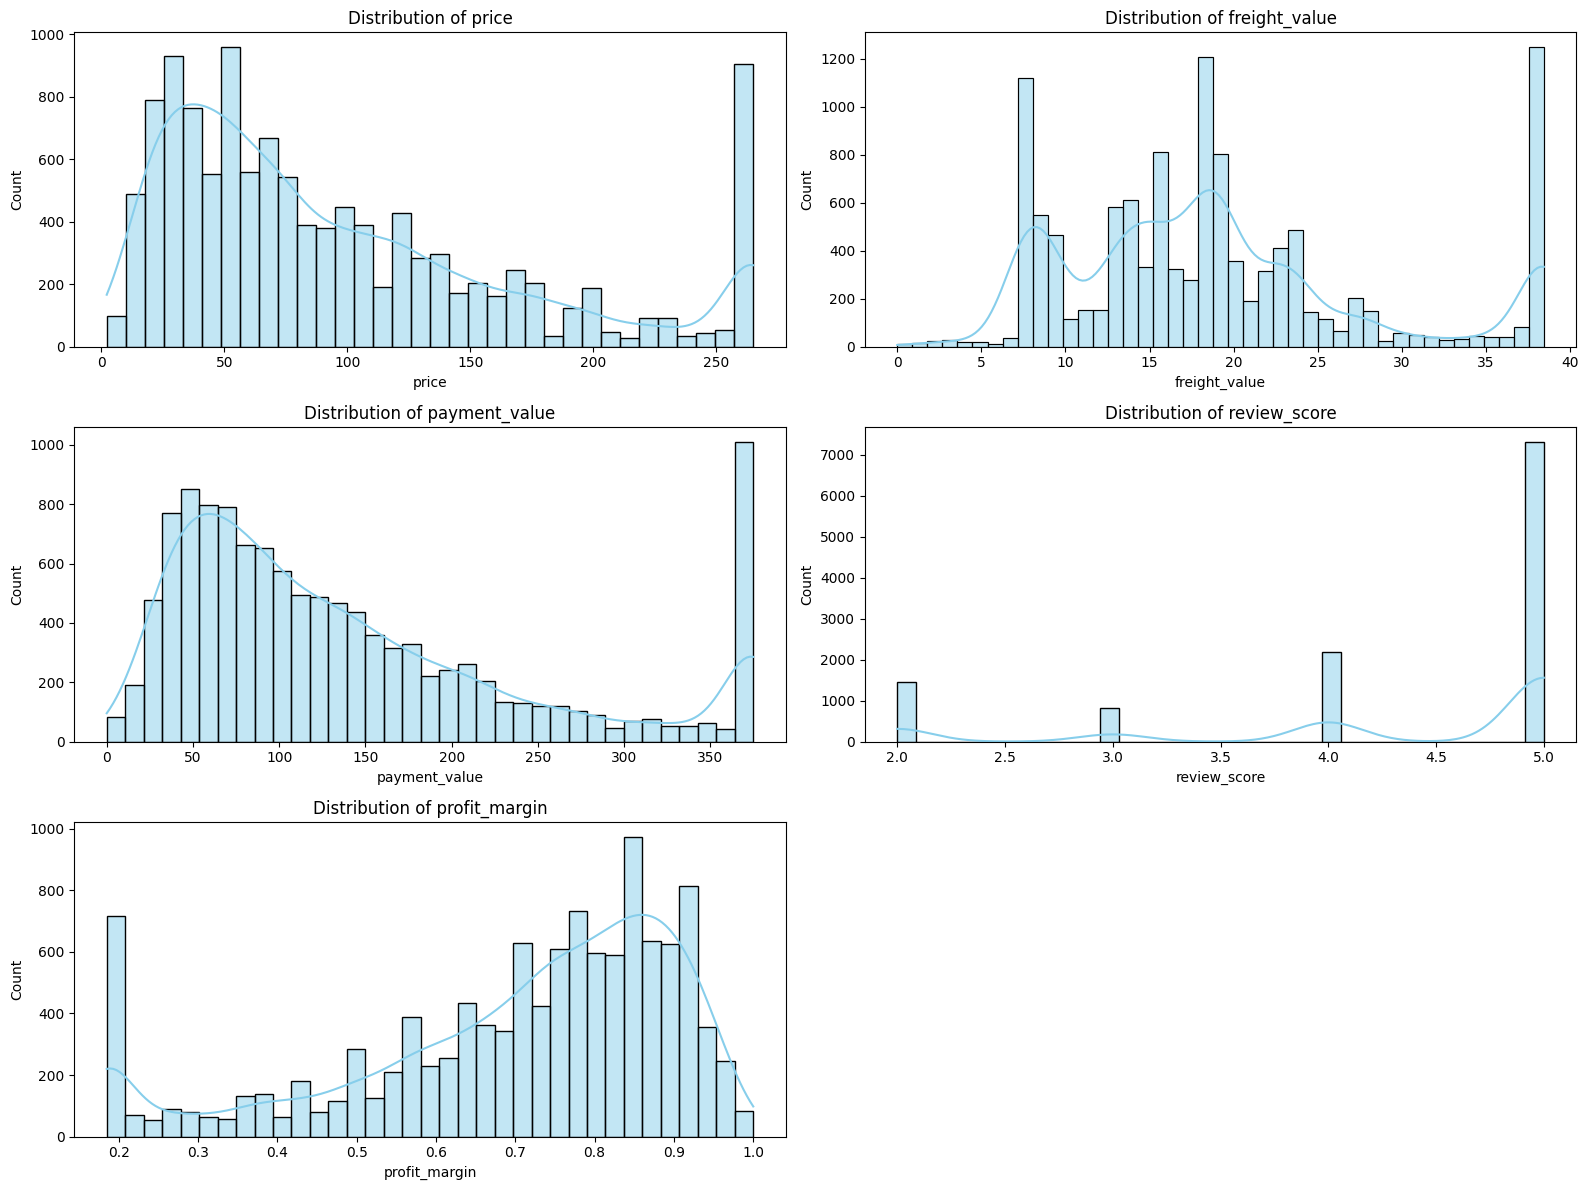

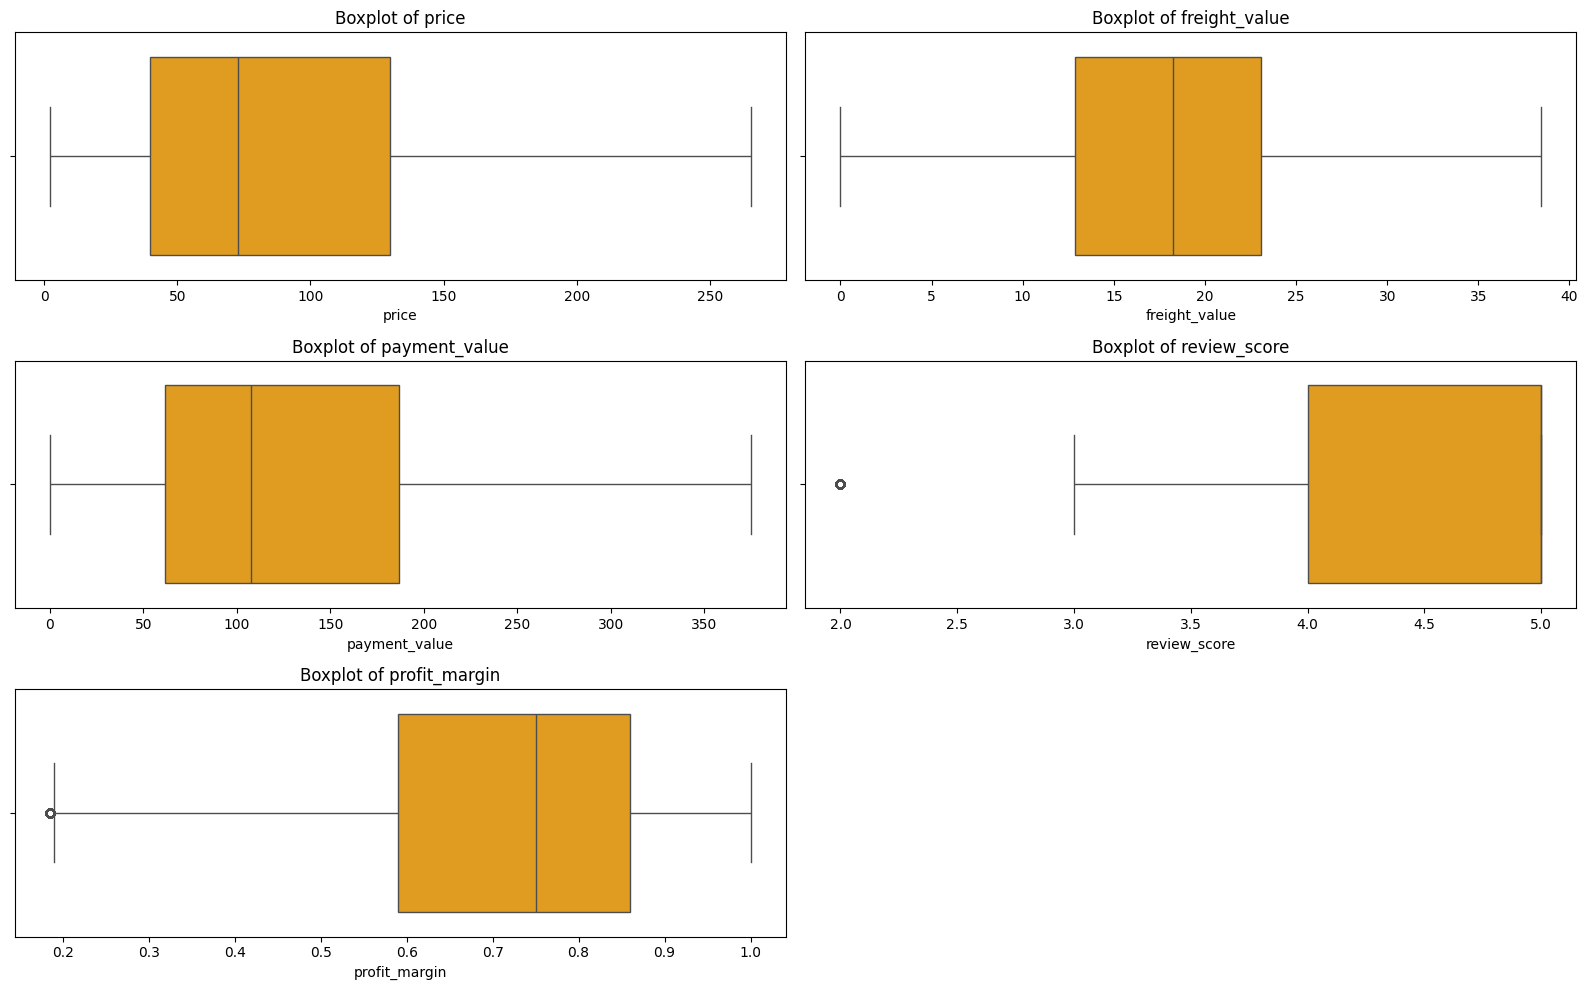

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to analyze
num_features = ['price', 'freight_value', 'payment_value', 'review_score', 'profit_margin']

# Set up plotting area
plt.figure(figsize=(16, 12))

for i, col in enumerate(num_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=col, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(16, 10))
# Create boxplots for each numerical feature
for i, col in enumerate(num_features, 1):# enumerate starts counting from 1
    plt.subplot(3, 2, i) # 3 rows, 2 columns
    sns.boxplot(data=df, x=col, color='orange')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()



## Summary of Histogram (Numerical Variables)

| **Variable**      | **Distribution Shape**     | **Key Observations**                                                                                   | **Potential Insights**                                                                 |
|--------------------|-----------------------------|--------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------|
| **price**          | Right-skewed               | Majority of products are low-priced (<100), but a few outliers exist with high prices (>250).          | Indicates a wide price range; pricing strategy may be segmented.                      |
| **freight_value**  | Multimodal                 | Peaks at multiple points; some freight charges are zero or very low.                                   | Suggests varying shipping policies; free shipping cases should be investigated.       |
| **payment_value**  | Right-skewed               | Most payments are concentrated below 150, with a few very high transactions (>350).                   | High-value payments may correspond to bulk purchases or premium products.             |
| **review_score**   | Discrete peaks              | Strong peak at 5 (positive reviews), fewer at 2 and 3, minimal at 1.                                   | Customers mostly satisfied, but negative reviews exist and should be analyzed further.|
| **profit_margin**  | Slightly left-skewed        | Most products have high profit margins (>0.7), fewer products with low margins (<0.3).                | Business model appears profitable, but low-margin products may need reassessment.     |
-

## Summary of Boxplot Analysis (Numerical Variables)

| **Variable**      | **Median**         | **Spread**                          | **Outliers**                                                                 | **Key Insights**                                                                 |
|--------------------|---------------------|-------------------------------------|-------------------------------------------------------------------------------|----------------------------------------------------------------------------------|
| **Price**          | Mid-range          | Wide spread                        | High-end outliers (very expensive items) and few low-end outliers             | Product pricing is diverse; premium items significantly raise price range.      |
| **Freight Value**  | ~15–20             | Moderate spread                    | High-end outliers (special/large shipments), some very low-cost values        | Shipping costs are stable, but special cases lead to variability.               |
| **Payment Value**  | ~100–150           | High variability                   | Outliers at higher values (large transactions)                                | Indicates mixed spending patterns; recurring transactions exist.                 |
| **Review Score**   | 4–5 (high)         | Concentrated at top end            | Low scores (outliers) at around 2                                             | Customers are mostly satisfied, few products receive poor reviews.              |
| **Profit Margin**  | 0.8–0.9            | Narrow spread (high margins)       | Few low-margin outliers                                                      | Business is profitable; only a few transactions approach break-even.            |

---

**Overall:**  
- Pricing, payments, and shipping costs show diversity with clear outliers.  
- Customer satisfaction is high (review scores).  
- Profit margins are consistently strong.  


---



## Step 4.2. Analysis of Categorical Variables

Categorical variables help us understand distribution patterns, dominant categories, and potential relationships with other features.  
In this dataset, we have several important categorical variables such as:

- **order_status**
- **payment_type**
- **customer_state**
- **seller_state**
- **product_category_name_english**

We will start by visualizing their **frequency distributions** to identify the most common categories and detect any irregularities.

## Why are we doing this?
- To **check for dominant or rare categories** that may affect model performance.  
- To **spot anomalies** (e.g., unexpected categories).  
- To **inform feature engineering** (e.g., grouping rare categories).




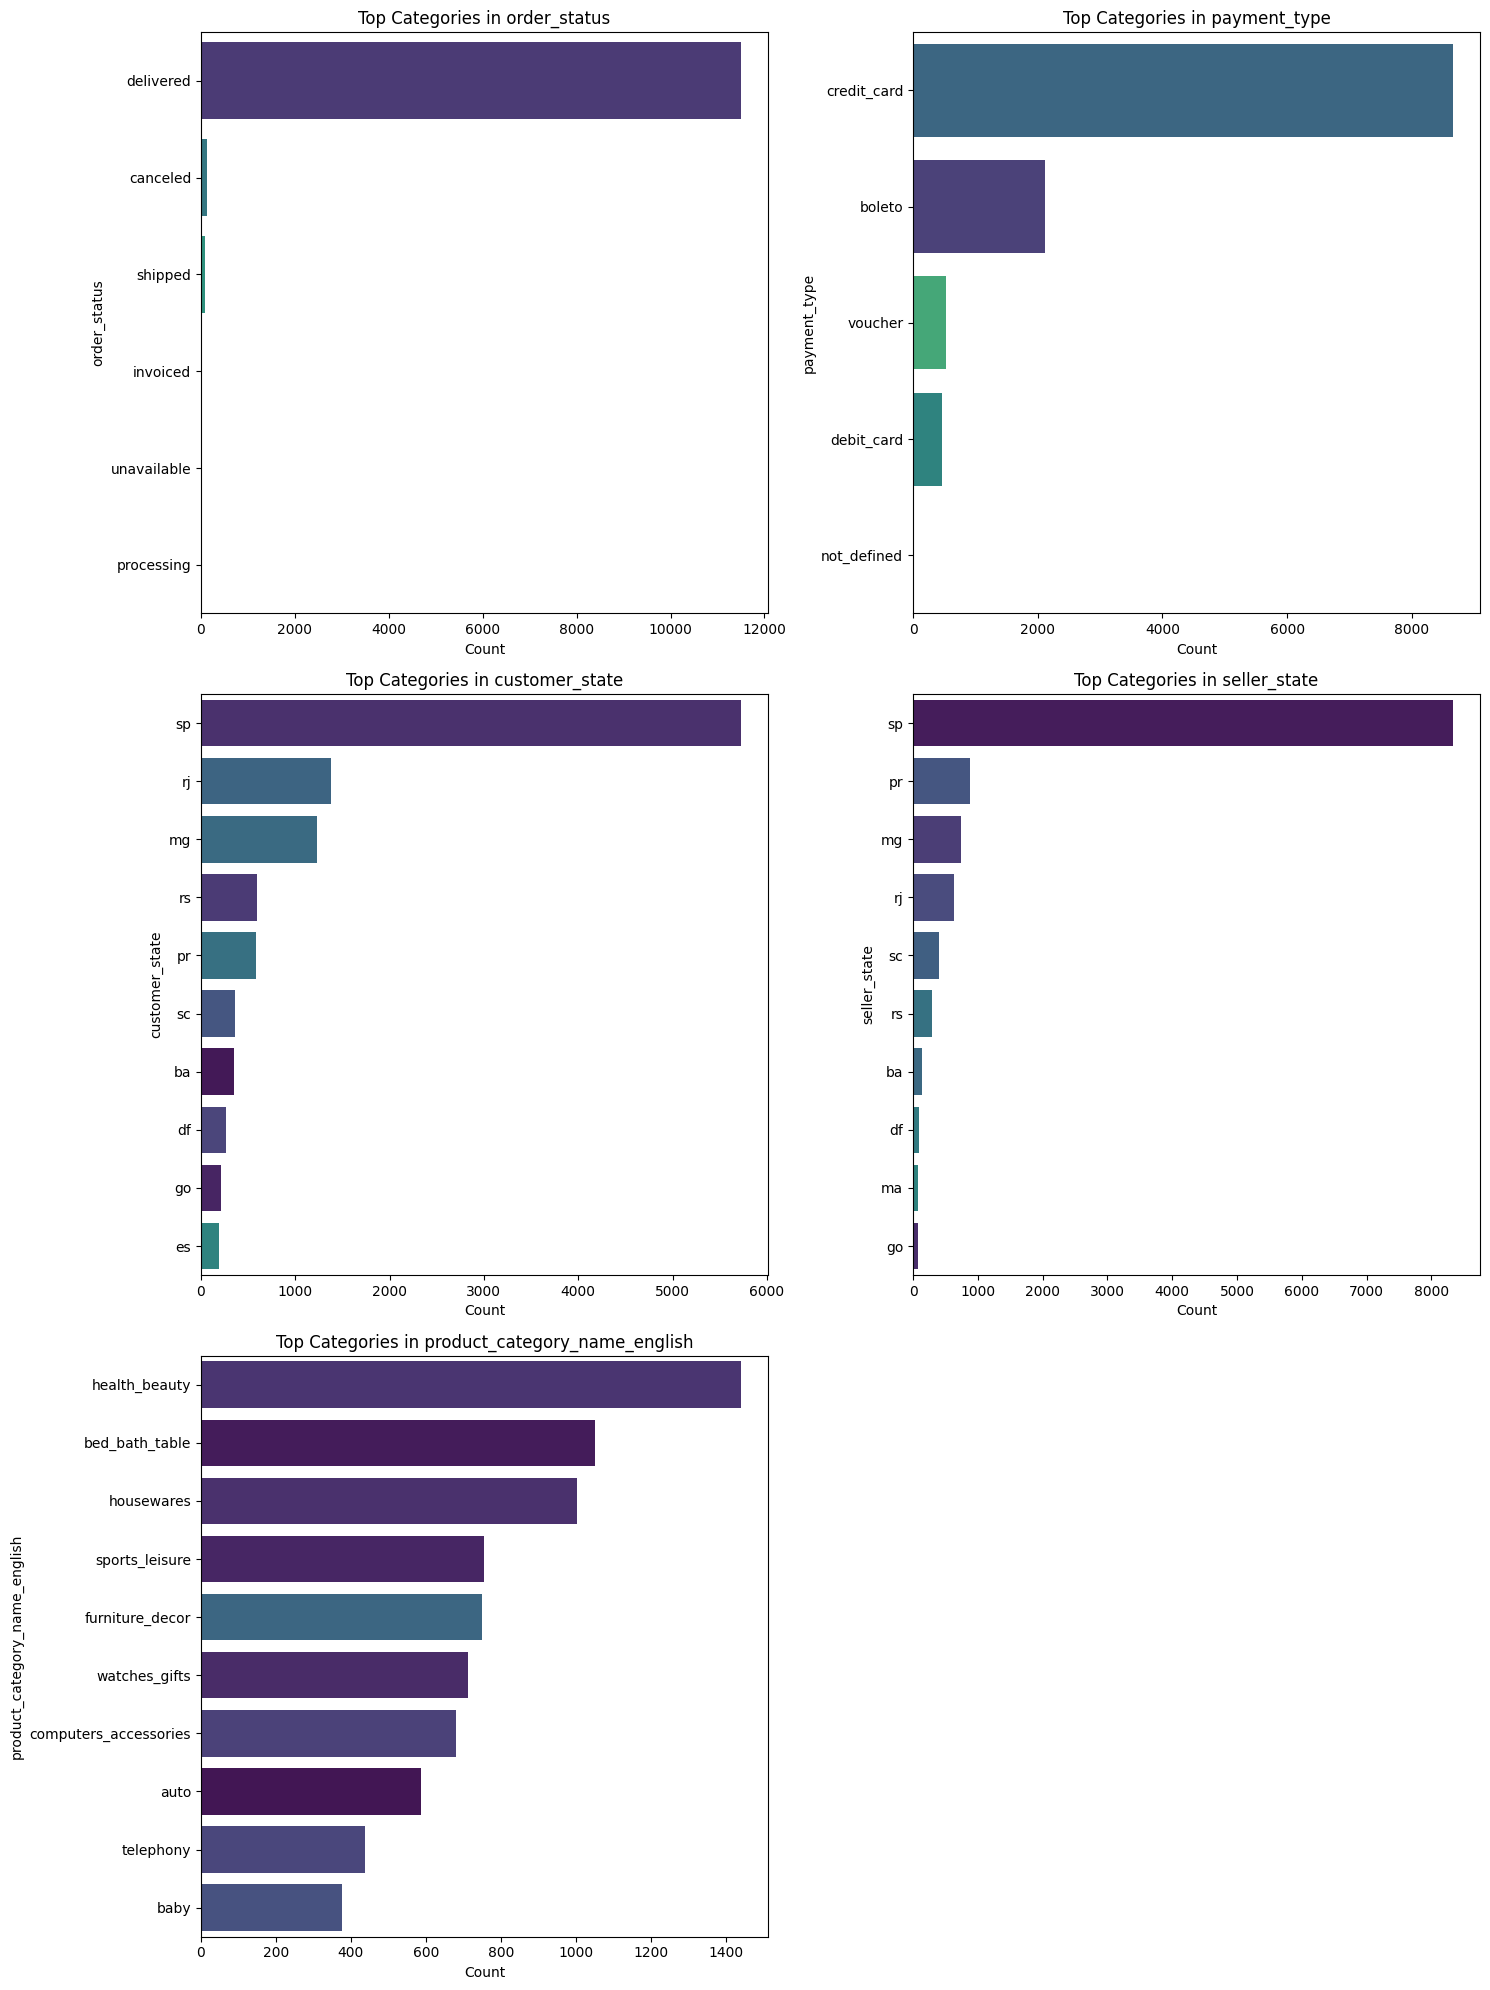

In [8]:
# Frequency distribution of key categorical variables
categorical_cols = ['order_status', 'payment_type', 'customer_state', 
                    'seller_state', 'product_category_name_english']

import matplotlib.pyplot as plt
import seaborn as sns
# Set up the plotting area
plt.figure(figsize=(15,20))
# Create count plots for each categorical feature
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    order = df[col].value_counts().index[:10]  # Top 10 for better visibility
    sns.countplot(data=df, y=col, order=order, hue=col, palette="viridis", legend=False)
    plt.title(f"Top Categories in {col}")
    plt.xlabel("Count")
    plt.ylabel(col)

plt.tight_layout()
plt.show()



| **Variable**                   | **Key Findings**                                                                                                                                                    | **Implications / Recommendations**                                                                                 |
| ------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------ |
| **Order Status**               | Majority of orders are **delivered**. Few orders are canceled or unavailable.                                                                                       | Logistics are effective. Continue monitoring rare statuses (e.g., cancellations) to maintain fulfillment rates.    |
| **Payment Method**             | **Credit card** is the most used, followed by boleto. Minor use of voucher and debit card.                                                                          | Focus on optimizing credit card processing. Consider promotional strategies for alternative payment adoption.      |
| **Customer State (Geography)** | Customers mainly from **São Paulo (SP)**. Smaller customer bases in MG, RS, PR, etc.                                                                                | Leverage São Paulo dominance with targeted marketing. Expand outreach to underrepresented states.                  |
| **Seller State (Geography)**   | Sellers also concentrated in **São Paulo (SP)**. Other states have lower activity.                                                                                  | The centralized seller base simplifies logistics. Diversify seller base to enhance availability in other regions.  |
| **Product Category**           | **Health & Beauty** is the top-selling category. Other strong categories: bed\_bath\_table, housewares, sports\_leisure. Low sales in computers\_accessories, auto. | Prioritize inventory for high-demand categories. Investigate strategies to boost sales in lower-demand categories. |


## Step 5. Bivariate Analysis

In this section, we explore relationships between **two variables at a time**, particularly focusing on:

- **Correlation between numerical variables** (to identify linear relationships, redundancies, or potential predictors).
- **Comparison of categorical variables with numerical variables** (e.g., average price by payment type, freight value by state).
- **Detection of patterns or trends** that may not be visible in univariate analysis.

We will begin with a **Correlation Heatmap** to visualize relationships among numerical features.

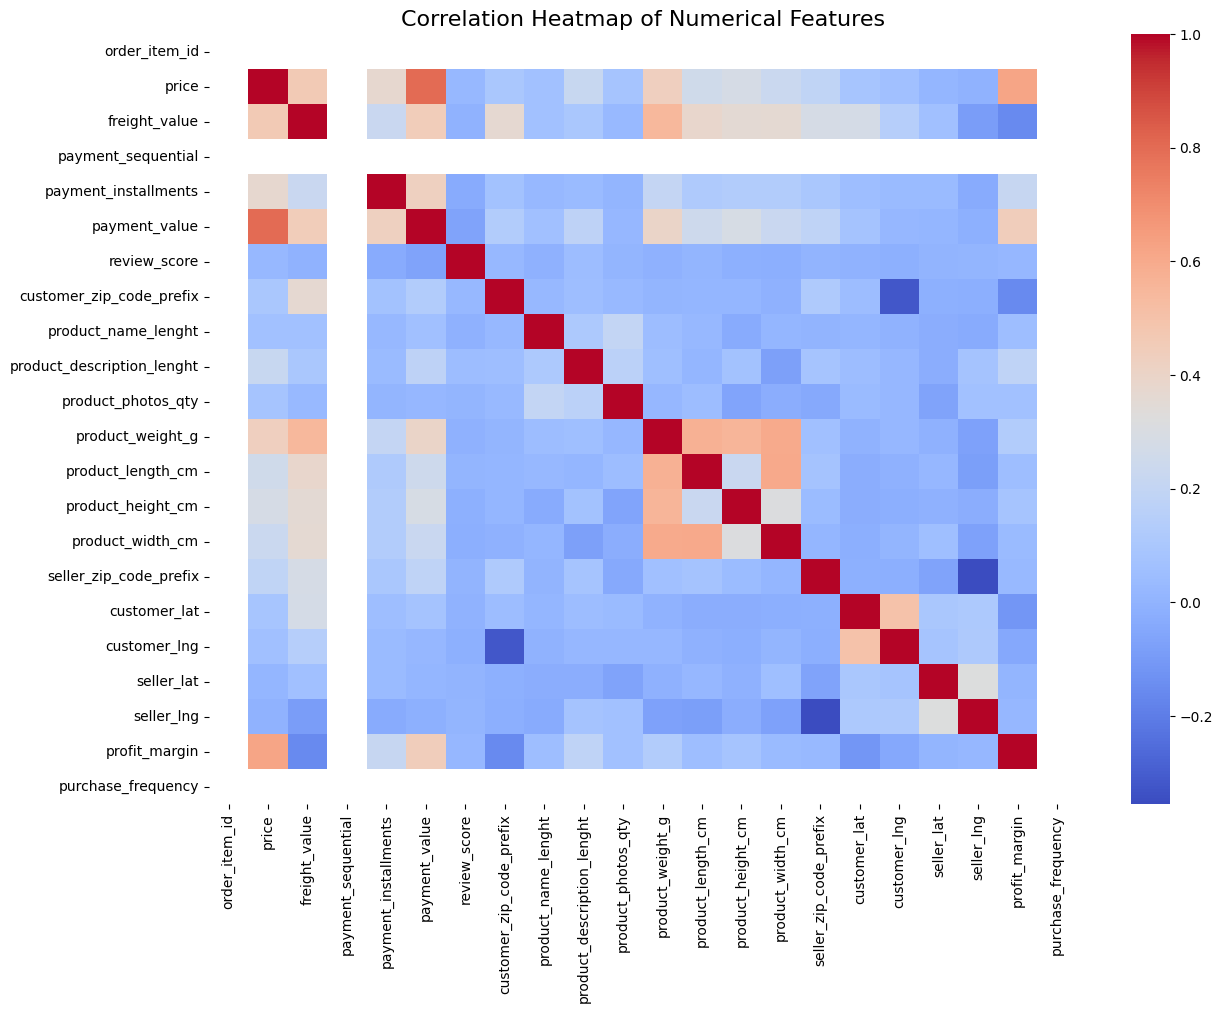

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()


##  Correlation Heatmap Analysis

The correlation heatmap provides a visual representation of the pairwise relationships between numerical variables in the dataset.

###  **1. Purpose of the Correlation Heatmap**
- To identify the **strength** and **direction** of relationships between variables.  
- To detect **highly correlated features** (positive or negative), which may indicate redundancy or multicollinearity.  
- To guide **feature selection** and **data preprocessing** before modeling.

---


###  **2. Key Observations from the Heatmap**
| **Feature Relationship**                  | **Observation**                                                                                  |
|-------------------------------------------|------------------------------------------------------------------------------------------------|
| **Price ↔ Freight_Value**                 | Strong positive correlation – higher-priced items tend to have higher shipping costs.         |
| **Payment-related features**              | `payment_value`, `payment_installments`, and `payment_sequential` show moderate correlation.  |
| **Product dimensions (length, width, weight)** | Positive correlations – larger products tend to weigh more and have larger dimensions.        |
| **Location features (customer & seller)** | Some correlations exist due to geographical proximity patterns.                                |
| **Profit Margin ↔ Purchase Frequency**    | Weak to moderate correlation – requires further investigation.                                 |

---

###  **4. Implications for Modeling**
- **Highly correlated variables** may need to be dropped or transformed to avoid multicollinearity.
- **Strong relationships** can help in **feature engineering** (e.g., combining related features).
- These insights guide the **selection of features** for predictive models.

---

###  **5. Limitations & Next Steps**
- **Correlation ≠ Causation** – strong correlations do not imply one variable causes another.  
- Further analysis (scatter plots, regression, domain-specific checks) is recommended.  
- Explore potential interactions between categorical and numerical variables in the next steps.

- Conclusion: 
The heatmap reveals meaningful relationships, especially between **pricing-related**, **payment-related**, and **product dimension** features, which will be critical for the upcoming modeling phases.
---

##  Bivariate Analysis: Categorical vs Numerical Variables

Bivariate analysis examines the relationship between **categorical variables** and **numerical features** in the dataset.  
This helps identify **how categories influence numerical metrics** such as price, freight value, payment value, and review scores.

---


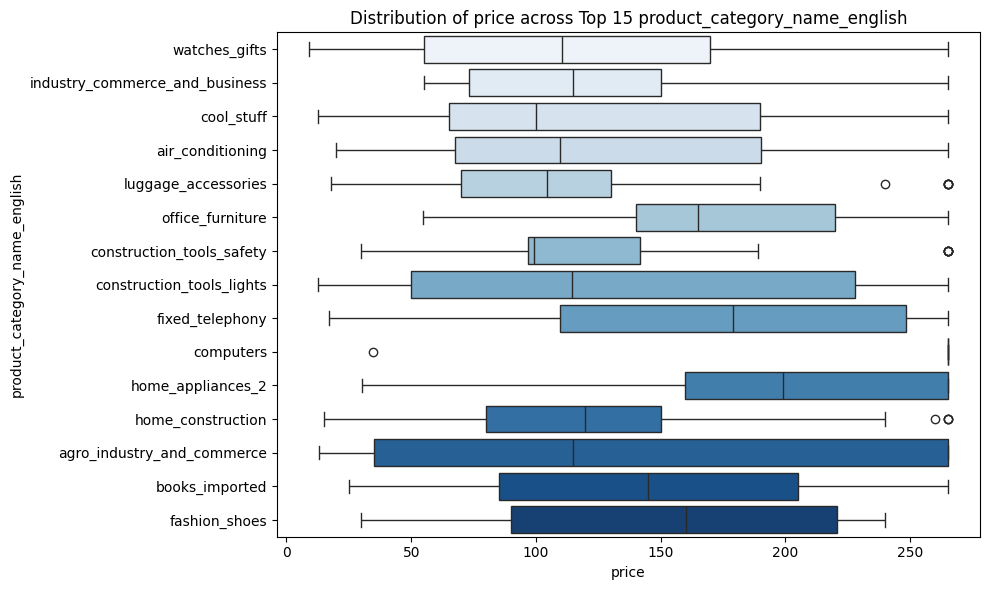

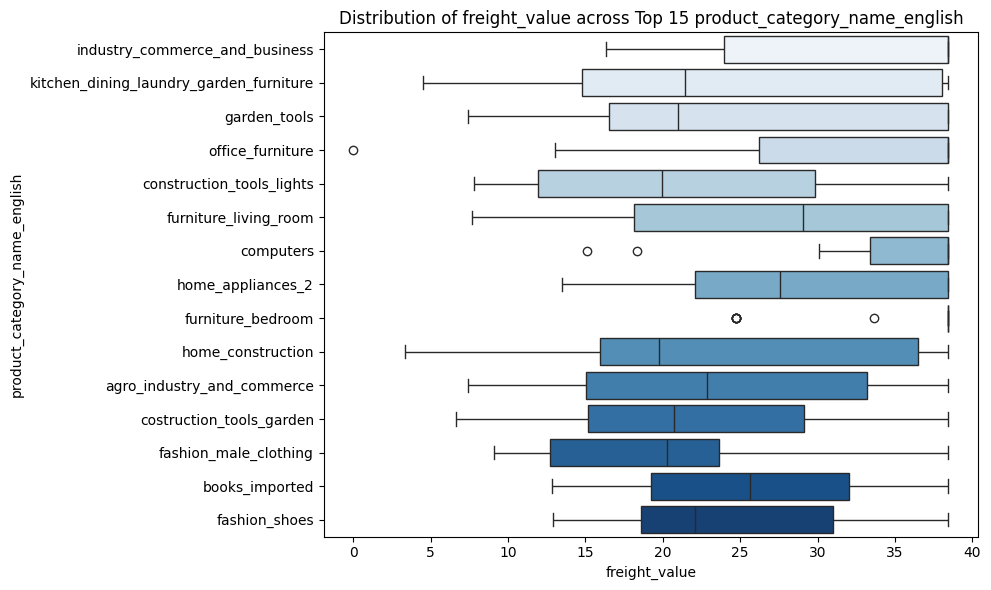

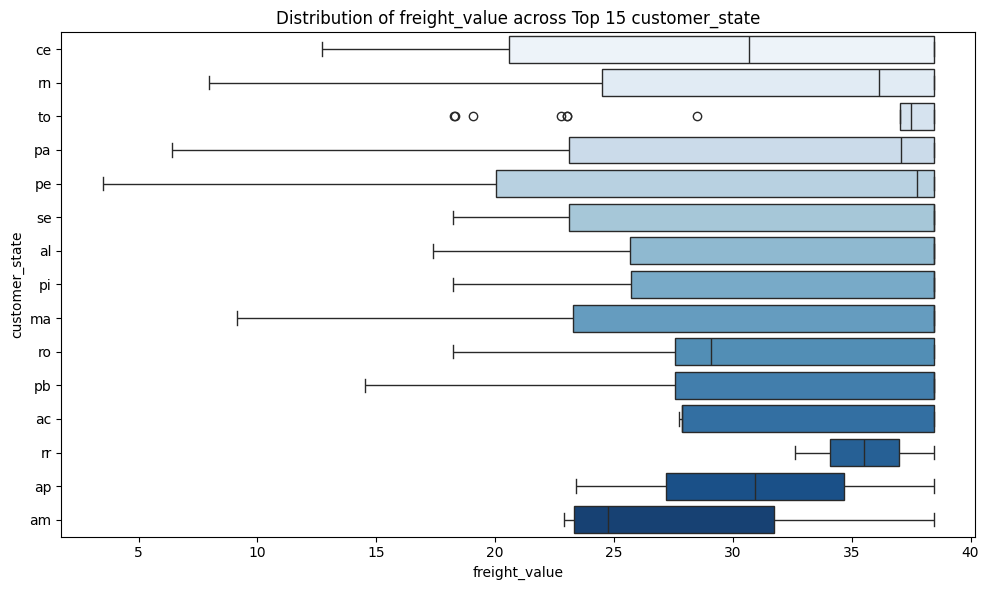

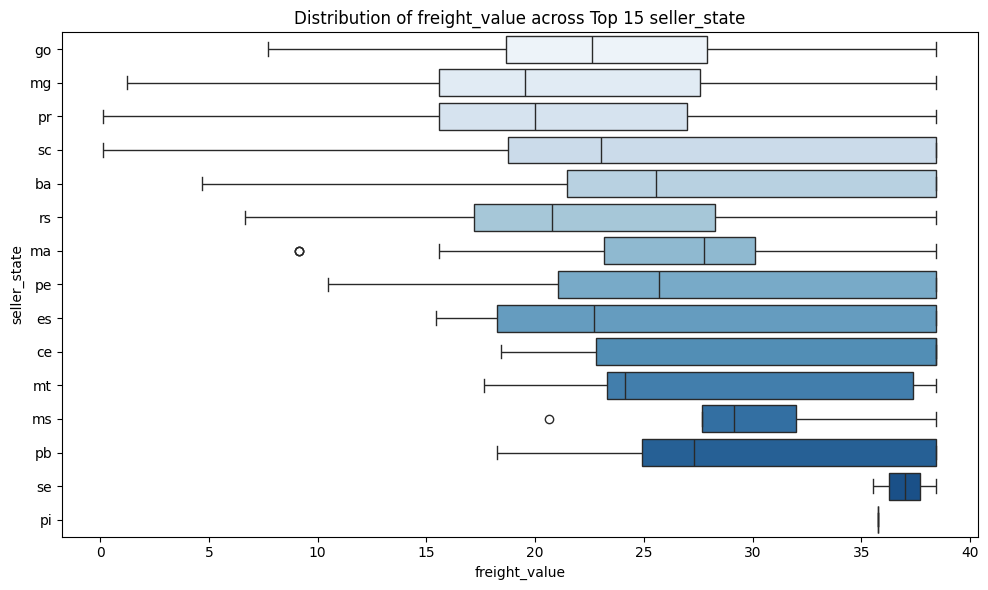

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots_for_pairs(data, pairs, top_n=15):
    """
    Creates horizontal boxplots for multiple categorical vs numerical variable pairs.
    - data: dataframe
    - pairs: list of tuples [('categorical_col', 'numerical_col'), ...]
    - top_n: number of top categories to show (default 15)
    """
    for cat_col, num_col in pairs:
        # Select top categories to avoid clutter
        top_categories = data.groupby(cat_col)[num_col].median().sort_values(ascending=False).head(top_n).index
        filtered_df = data[data[cat_col].isin(top_categories)]

        plt.figure(figsize=(10, 6))
        sns.boxplot(
    data=filtered_df,
    y=cat_col,
    x=num_col,
    palette="Blues",
    hue=cat_col,
    legend=False
)
        plt.title(f"Distribution of {num_col} across Top {top_n} {cat_col}")
        plt.xlabel(num_col)
        plt.ylabel(cat_col)
        plt.tight_layout()
        plt.show()

# ✅ Define all pairs you want to analyze
pairs_to_plot = [
    ('product_category_name_english', 'price'),
    ('product_category_name_english', 'freight_value'),
    ('customer_state', 'freight_value'),
    ('seller_state', 'freight_value')
]

# ✅ Generate plots
plot_boxplots_for_pairs(df, pairs_to_plot, top_n=15)


## Bivariate Analysis: Distribution Across Categories and States

### 1. **Price Distribution Across Product Categories**

The boxplot for **Price vs Product Category** provides insights into how prices vary across the top 15 product categories.

- **Key Observations:**
  - Categories like **watches_gifts** and **industry_commerce_and_business** exhibit **higher median prices**, suggesting they are premium or specialized products.
  - **Computers** and **home_appliances_2** also show relatively high prices, along with several outliers indicating a few extremely expensive items.
  - **Cool_stuff** and **office_furniture** have **lower median prices**, highlighting these categories as more affordable.
  - The **presence of many outliers** across categories implies significant price diversity within the same category.

---

### 2. **Freight Value Distribution Across Product Categories**

The boxplot for **Freight Value vs Product Category** reveals shipping cost variations among product categories.

- **Key Observations:**
  - Categories like **kitchen_dining_laundry_garden_furniture**, **garden_tools**, and **furniture_living_room** have **higher median freight costs**, possibly due to larger or heavier items.
  - **Fashion_male_clothing** and **books_imported** tend to have **lower freight costs**, reflecting smaller and lighter products.
  - Outliers with **very high freight values** suggest occasional special shipping requirements or long-distance deliveries.

---

### 3. **Freight Value Across Top 15 Customer States**

The boxplot for **Freight Value vs Customer States** helps to understand regional differences in shipping costs.

- **Key Observations:**
  - States like **ce**, **m**, **to**, and **pa** have **higher median freight values**, suggesting that deliveries to these areas are costlier—likely due to distance or logistics.
  - Most states cluster around **freight values between 20 and 30**, indicating stable shipping costs for the majority of customers.
  - Several **outliers** reflect shipments with abnormally high costs.

---

### 4. **Freight Value Across Top 15 Seller States**

The boxplot for **Freight Value vs Seller States** examines shipping costs from different seller regions.

- **Key Observations:**
  - Sellers in **pe**, **es**, and **ce** incur **higher median freight values**, which may indicate these locations are farther from major customer bases or involve higher handling costs.
  - Most seller states have freight costs within a narrow range (20–35), showing general uniformity in shipping rates.
  - Some states like **se** and **pi** display **outliers** with extremely high freight costs, possibly for large shipments or distant deliveries.

---

## **Overall Interpretation**

- **Price Variability**: Certain product categories are consistently high-priced while others are lower, with substantial price outliers pointing to a mix of product qualities and customer segments.
- **Freight Cost Variability**: Shipping costs differ based on both product type and geographical region. Larger items naturally incur higher freight charges.
- **Geographical Insights**: Both customer and seller states influence freight costs, with certain states standing out for higher shipping expenses.
- **Business Implications**:
  - Focus on optimizing logistics in high-cost states.
  - Maintain inventory strategies considering category-specific freight and price behaviors.
  - Investigate outlier transactions to understand special conditions that raise costs significantly.


## Multivariate Analysis
### Why We Do This?
- While univariate and bivariate analyses give a good idea of individual distributions and pairwise relationships, multivariate analysis helps us:

- Understand interactions between multiple variables simultaneously.

- Identify patterns that may not be visible in pairwise analysis.

- Improve decision-making for feature engineering and modeling.

1. **Scatter Plot (Price vs. Freight Value by Product Category)**
This plot examines how product prices relate to freight value and whether this relationship varies across top product categories.

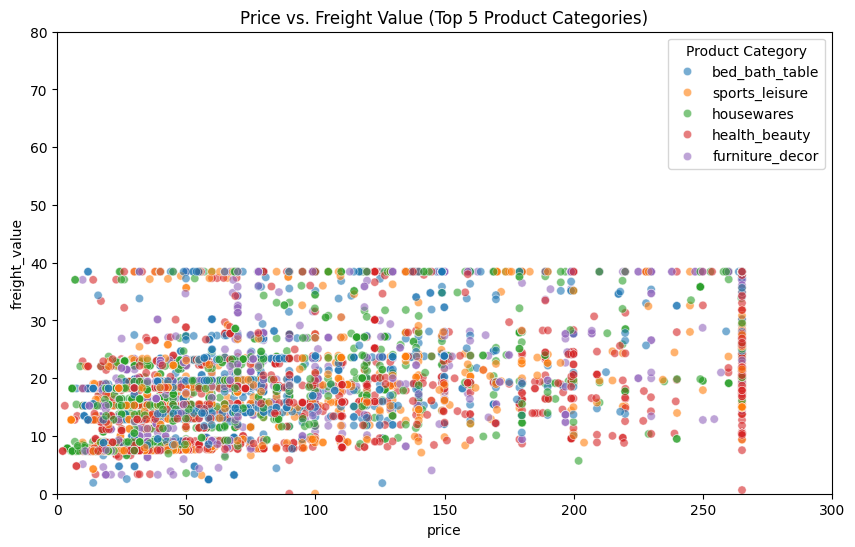

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Focus on top 5 product categories to reduce clutter
top_categories = df['product_category_name_english'].value_counts().index[:5]
df_top = df[df['product_category_name_english'].isin(top_categories)]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_top, x='price', y='freight_value', hue='product_category_name_english', alpha=0.6)
plt.xlim(0,300)   # Limit X-axis to remove extreme outliers
plt.ylim(0,80)    # Limit Y-axis for better view
plt.title("Price vs. Freight Value (Top 5 Product Categories)")
plt.legend(title='Product Category')
plt.show()


##  Price vs. Freight Value by Top 5 Product Categories  
**Visualization Used:** Scatter Plot colored by product categories.

### Purpose:
- To analyze how shipping costs relate to product prices across categories.  
- To detect differences in freight strategies or product characteristics.

### Detailed Insights:
- **Distribution Patterns:**  
  - Categories like **furniture_decor** and **auto** show higher freight values due to larger or heavier products.  
  - Categories such as **books_general_interest** or **toys** have lower freight costs due to lighter items.

- **Category-Specific Trends:**  
  - **bed_bath_table:** Moderate to high freight with a wide range of prices.  
  - **sports_leisure:** Variable freight depending on item type (large vs. small equipment).  

- **Outliers:**  
  - High-priced items with high freight costs appear as rare cases, significant for logistics analysis.

### Business Implications:
- Identifies categories where shipping costs are disproportionately high.  
- Provides insights to optimize logistics and adjust pricing strategies.

---

2. **Pairplot of Key Numerical Variables**

- A pairplot gives scatterplots for all pairs of selected numerical features along with their distributions.

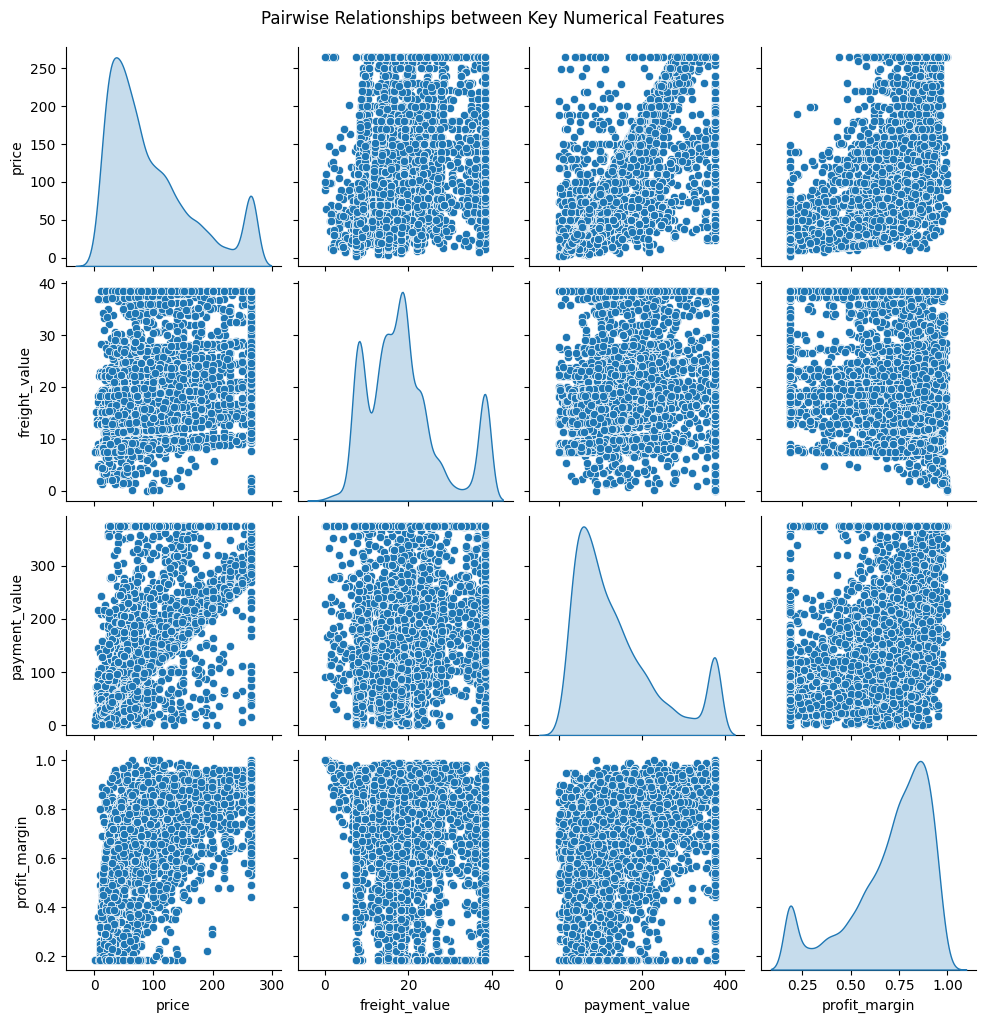

In [18]:
# Select key numerical features
num_features = ['price', 'freight_value', 'payment_value', 'profit_margin']

sns.pairplot(df[num_features], diag_kind='kde')
plt.suptitle("Pairwise Relationships between Key Numerical Features", y=1.02)
plt.show()



## Pairwise Relationships between Key Numerical Features  
**Visualization Used:** Pairplot (Scatterplot Matrix) of `price`, `freight_value`, `payment_value`, and `profit_margin`.

### Purpose:
- To explore relationships, correlations, and distributions among multiple numerical features.  
- To identify potential patterns, clusters, or outliers.

### Detailed Insights:
- **Distributions (Diagonal Histograms):**  
  - **Price:** Skewed with a peak at lower prices, long tail toward high prices.  
  - **Freight Value:** Positively skewed; higher freight costs are less frequent.  
  - **Payment Value:** Similar distribution to price; likely positively skewed.  
  - **Profit Margin:** Bounded between 0 and 1, with possible skewness based on profit strategies.

- **Pairwise Relationships:**  
  - **Price vs. Freight Value:** Positive correlation; expensive items often have higher freight costs.  
  - **Price vs. Payment Value:** Strong positive correlation; payment value rises with price.  
  - **Price vs. Profit Margin:** Shows how profit margins vary with price.  
  - **Freight Value vs. Payment Value:** Reflects relationship between shipping expenses and transaction size.

- **Outliers & Clusters:**  
  - Outliers indicate rare high-value transactions or potential anomalies.  
  - Clusters may suggest distinct customer segments or product groupings.

### Implication:
These relationships help in feature engineering, guiding predictive modeling, and understanding underlying data structure.

---


3. **Group-wise Aggregation: Average Price per Category per State**

- This shows how product prices vary by product category and by customer state.

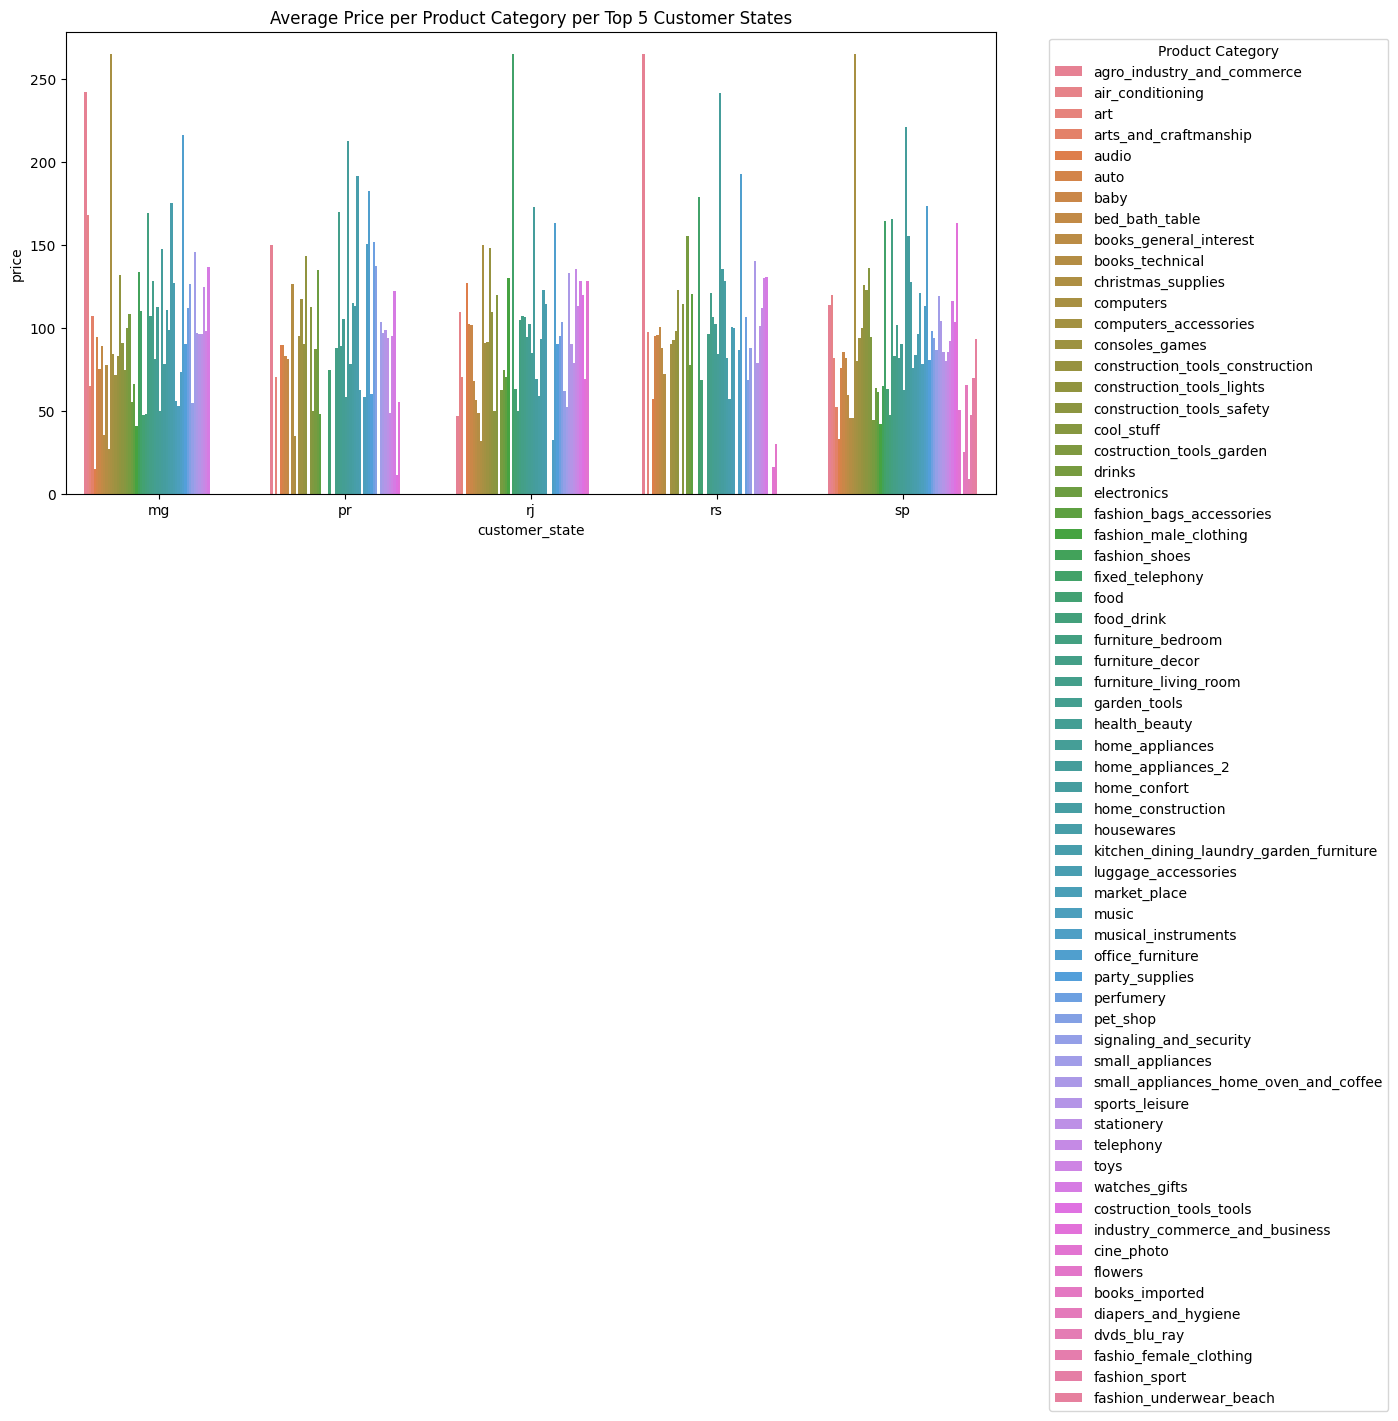

In [ ]:
# Compute average price per category per customer state (top 5 states for clarity)
top_states = df['customer_state'].value_counts().index[:5]
df_grouped = (df[df['customer_state'].isin(top_states)]
              .groupby(['customer_state','product_category_name_english'])['price']
              .mean().reset_index())

plt.figure(figsize=(12,6))
sns.barplot(data=df_grouped, x='customer_state', y='price', hue='product_category_name_english')
plt.title("Average Price per Product Category per Top 5 Customer States")
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


##  Average Price per Product Category per Top 5 Customer States  
**Visualization Used:** Grouped Bar Chart (Average Price by Product Category & State)

###  Purpose:
- To compare how product prices vary across different states.  
- To uncover regional differences in demand and pricing.

###  Detailed Insights:
- **Regional Variations:**  
  - States like **pr**, **rs**, and **sp** exhibit higher average prices for certain categories.  
  - Wealthier states may have higher willingness to pay.

- **Product Category Trends:**  
  - Some categories (e.g., electronics, auto) show consistent pricing across states.  
  - Others (e.g., garden_tools, books_imported) vary greatly by region.

- **Customer Preferences:**  
  - Regional differences suggest certain states favor specific categories, influencing demand.

###  Business Implications:
- Helps tailor regional pricing and marketing strategies.  
- Supports inventory planning by understanding geographic purchasing patterns.

---

## ***Summary of Multivariate Analysis***
- **Pairplot:** Revealed fundamental relationships guiding feature selection.  
- **Scatter Plot:** Showed how freight relates to price, highlighting logistical challenges.  
- **Regional Analysis:** Emphasized the impact of geography on pricing and demand.  

***These insights provide a strong foundation for the next steps: **Feature Engineering*****

---

##  Feature Engineering

### What is Feature Engineering?
Feature engineering is the process of creating new input features or transforming existing ones to improve the performance of machine learning models. This step involves leveraging domain knowledge and data patterns to make the dataset more informative for modeling.

### Why Are We Doing This?
- **Improve Model Performance**: Well-engineered features help algorithms capture underlying relationships more effectively.
- **Reduce Noise**: By transforming or aggregating features, we can remove irrelevant variations in the data.
- **Capture Nonlinear Relationships**: Creating interaction terms or polynomial features can reveal complex relationships between variables.
- **Handle Data Limitations**: Sometimes, raw data lacks meaningful indicators, so new features can fill this gap.

### Typical Steps in Feature Engineering
1. **Feature Creation**: Creating new variables from existing ones (e.g., profit ratio, days taken for delivery, price per weight).
2. **Feature Transformation**: Applying log scaling, standardization, or encoding to prepare data for algorithms.
3. **Feature Encoding**: Converting categorical variables into numerical representations (e.g., one-hot encoding, label encoding).
4. **Feature Selection**: Choosing the most relevant features to avoid multicollinearity and reduce dimensionality.

### Why It Matters in This Project?
For this dataset, feature engineering can:
- Extract time-based features (e.g., delivery delays, approval times).
- Create ratios like `freight_value/price` to understand cost efficiency.
- Encode categorical variables like product categories and states for modeling.
- Aggregate or normalize features to capture meaningful patterns.




## Step 1.Extracting Date-Time Features
- We start by extracting useful components (year, month, day, hour) from the order_purchase_timestamp column.

**Why?**

- Time-based features help uncover seasonality, trends, and purchase behavior patterns, which can improve prediction and insights.

In [21]:
# Convert the timestamp to datetime format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

# Extract date components
df['purchase_year'] = df['order_purchase_timestamp'].dt.year
df['purchase_month'] = df['order_purchase_timestamp'].dt.month
df['purchase_day'] = df['order_purchase_timestamp'].dt.day
df['purchase_hour'] = df['order_purchase_timestamp'].dt.hour

# Preview the new features
df[['order_purchase_timestamp', 'purchase_year', 'purchase_month', 'purchase_day', 'purchase_hour']].head()


,order_purchase_timestamp,purchase_year,purchase_month,purchase_day,purchase_hour
0,2018-07-24 20:41:37,2018,7,24,20
1,2018-08-08 08:38:49,2018,8,8,8
2,2018-07-25 17:44:10,2018,7,25,17
3,2018-08-09 11:44:40,2018,8,9,11
4,2018-07-29 23:34:51,2018,7,29,23


## Step 2. Creating Delivery Delay Indicator

- Next, we create a binary feature indicating whether an order was delivered after the estimated delivery date.

**Why?**

- Late deliveries often impact customer reviews and can be a critical business KPI.

In [22]:
# Convert estimated delivery column
df['order_estimated_delivery_date'] = pd.to_datetime(df['order_estimated_delivery_date'])

# Create a binary column for delay
df['is_delayed'] = (df['order_delivered_customer_date'] > df['order_estimated_delivery_date']).astype(int)

# Preview
df[['order_delivered_customer_date', 'order_estimated_delivery_date', 'is_delayed']].head()


,order_delivered_customer_date,order_estimated_delivery_date,is_delayed
0,2018-08-07 15:27:45,2018-08-13,0
1,2018-08-17 18:06:29,2018-09-04,0
2,2018-07-30 15:52:25,2018-08-08,0
3,2018-08-13 18:24:27,2018-08-17,0
4,2018-07-31 22:48:50,2018-08-06,0


## Step 5.Log Transformation of Skewed Variables

- Finally, we reduce skewness in variables with long-tailed distributions (e.g., price, freight_value, payment_value).

**Why?**

- Log transformation helps stabilize variance and makes data more normal, improving model performance.

In [23]:
# Apply log1p (log(1+x)) to handle zero values
for col in ['price', 'freight_value', 'payment_value']:
    df[f'log_{col}'] = np.log1p(df[col])

# Preview
df[['price', 'log_price', 'freight_value', 'log_freight_value']].head()


,price,log_price,freight_value,log_freight_value
0,118.7,4.784989,22.76,3.168003
1,159.9,5.080783,19.22,3.006672
2,19.9,3.039749,12.80,2.624669
3,89.9,4.509760,14.21,2.721953
4,179.0,5.192957,9.41,2.342767


| **Feature Name**       | **Type**                | **Description**                                                                  |
| ---------------------- | ----------------------- | -------------------------------------------------------------------------------- |
| `purchase_year`        | Numerical               | Extracted year of purchase from the timestamp.                                   |
| `purchase_month`       | Numerical               | Extracted month of purchase to analyze seasonality.                              |
| `purchase_day`         | Numerical               | Day of the month when the purchase occurred.                                     |
| `purchase_hour`        | Numerical               | Hour of purchase to identify peak purchase times.                                |
| `actual_delivery_days` | Numerical               | Number of days taken to deliver the order.                                       |
| `is_delayed`           | Binary (0/1)            | Indicator whether the order was delivered after the estimated delivery date.     |
| `price_per_gram`       | Numerical               | Ratio of product price to product weight, useful for freight and pricing models. |
| `log_price`            | Numerical (Transformed) | Log-transformed version of product price to reduce skewness.                     |
| `log_freight_value`    | Numerical (Transformed) | Log-transformed freight cost for better model stability.                         |
| `log_payment_value`    | Numerical (Transformed) | Log-transformed payment value to normalize data distribution.                    |
